# 70 years of machine learning in geoscience
Accompanies https://arxiv.org/abs/2006.13311
## Visualizations
Some programmatically generated figures for the book chapter.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl

rb = ['#990000','#030f4f', ]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=rb)
mpl.rcParams.update({'font.size': 20})

### Activation Functions

In [ ]:
def plot_act(funk, der=None, x_min=-7, x_max=7, y_min=-1, y_max=1, y_label="", z_label="", title="", filename=None):
    x = np.linspace(x_min, x_max, 10000)
    y = funk(x)
    if der is not None:
        z = der(x)


    fig = plt.figure(figsize=(12,4))
    ax = plt.gca()
    
    ax.plot(x, y, label=y_label)
    if der is not None:
        ax.plot(x, z, label=z_label)
    
    ax.grid(False)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min*1.05, y_max*1.05)

    if title:
        plt.title(title)
    if y_label or z_label:
        plt.legend()
    if filename is not None:
        plt.savefig(filename, dpi=300)

    plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

def relu(x):
    return x * (x > 0)

def drelu(x):
    return x > 0

def perceptron(x):
    return x > 0

def dperceptron(x):
    return x*0



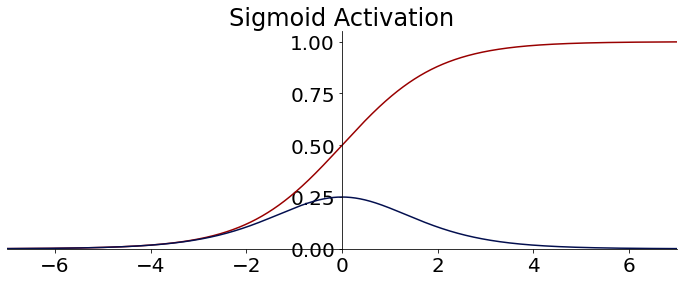

In [ ]:
plot_act(sigmoid, der=dsigmoid, y_min=0, title="Sigmoid Activation", filename="act_sig.png")

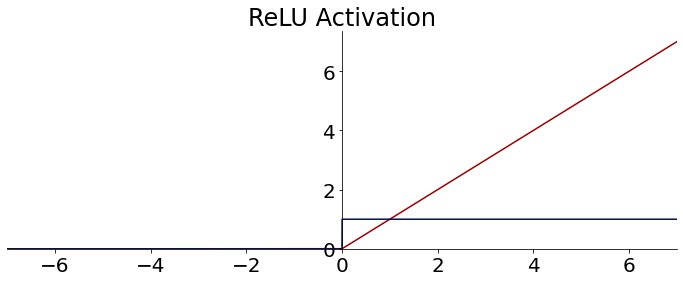

In [ ]:
plot_act(relu, der=drelu, y_min=0, y_max=7, title="ReLU Activation", filename="act_relu.png")

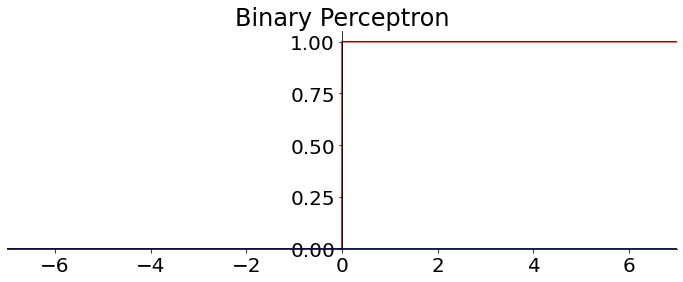

In [ ]:
plot_act(perceptron, der=dperceptron, y_min=0, title="Binary Perceptron", filename="act_perc.png")

### Radial Basis Function Kernel

In [ ]:
class_0 = (0.5, 0.5)
class_1 = np.array([[0, 1, 0, 1], [0.5, 0, 1, 1]])
x_center = .44
y_center = .33

In [ ]:
def rbf(x, lambd=.5, center=1):
    return np.exp(np.power( -(lambd * (x-center)), 2))

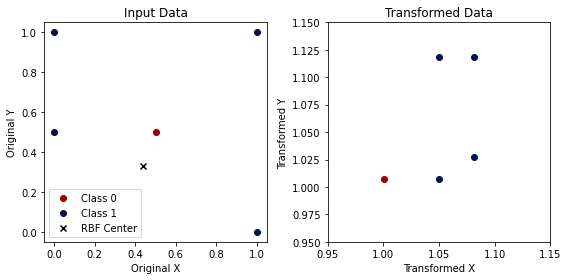

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].scatter(class_0[0], class_0[1], label="Class 0")
ax[0].scatter(class_1[0], class_1[1], label="Class 1")
ax[0].scatter(x_center, y_center, c="k", marker="x", label="RBF Center")
ax[0].set_title("Input Data")
ax[0].set_xlabel("Original X")
ax[0].set_ylabel("Original Y")
ax[0].set_xlim(-.05,1.05)
ax[0].set_ylim(-.05,1.05)
ax[0].legend()

ax[1].scatter(rbf(0.5, center=x_center), rbf(0.5, center=y_center), label="Class 0")
ax[1].scatter(rbf(class_1[0], center=x_center), rbf(class_1[1], center=y_center), label="Class 1")
ax[1].set_title("Transformed Data")
ax[1].set_xlabel("Transformed X")
ax[1].set_ylabel("Transformed Y")
ax[1].set_xlim(.95,1.15)
ax[1].set_ylim(.95,1.15)
plt.tight_layout()
plt.savefig("rbf-separation.png")